In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [4]:
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(2048, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(torch.max_pool2d(self.conv1(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv2(x), 2))
        x = x.view(x.size()[0], -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)

In [5]:
def train_model(model, optimizer, trainloader, testloader):
    model.train()
    train_losses, test_losses, test_accuracies, train_accuracies = [], [], [], []
    for epoch in range(15): 
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
        train_losses.append(running_loss / len(trainloader))
        train_accuracy = 100 * correct_train / total_train
        train_accuracies.append(train_accuracy)
        
        model.eval()
        test_loss = 0
        correct = 0
        with torch.no_grad():
            for data, target in testloader:
                outputs = model(data)
                test_loss += criterion(outputs, target).item()
                pred = outputs.data.max(1, keepdim=True)[1]
                correct += pred.eq(target.data.view_as(pred)).sum()
        test_losses.append(test_loss / len(testloader))
        test_accuracies.append(100. * correct / len(testloader.dataset))
        
        print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}')
    return train_losses, test_losses, train_accuracies, test_accuracies

In [6]:
def load_data(train_batch_size, test_batch_size):
    transform = transform=transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor(),transforms.Normalize((0.1309,), (0.3083,))])

    trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=train_batch_size, shuffle=True)

    testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=test_batch_size, shuffle=False)

    return (trainloader, testloader)



In [7]:
criterion = nn.CrossEntropyLoss()
model1 = CNN_Model()
optimizer1 = optim.Adam(model1.parameters(), lr=0.01)
train_loader, test_loader = load_data(600, 600)
batch_1_train_loss, batch_1_test_loss, batch_1_train_acc, batch_1_test_acc = train_model(model1, optimizer1, train_loader, test_loader)
batch_param_1 = torch.nn.utils.parameters_to_vector(model1.parameters())


model2 = CNN_Model()
optimizer2 = optim.Adam(model2.parameters(), lr=0.01)
train_loader, test_loader = load_data(200, 200)
batch_2_train_loss, batch_2_test_loss, batch_2_train_acc, batch_2_test_acc = train_model(model2, optimizer2, train_loader, test_loader)
batch_param_2 = torch.nn.utils.parameters_to_vector(model2.parameters())

Epoch 1, Train Loss: 0.2658, Test Loss: 0.0545
Epoch 2, Train Loss: 0.0502, Test Loss: 0.0362
Epoch 3, Train Loss: 0.0320, Test Loss: 0.0362
Epoch 4, Train Loss: 0.0249, Test Loss: 0.0465
Epoch 5, Train Loss: 0.0201, Test Loss: 0.0365
Epoch 6, Train Loss: 0.0154, Test Loss: 0.0447
Epoch 7, Train Loss: 0.0168, Test Loss: 0.0343
Epoch 8, Train Loss: 0.0157, Test Loss: 0.0458
Epoch 9, Train Loss: 0.0134, Test Loss: 0.0512
Epoch 10, Train Loss: 0.0155, Test Loss: 0.0464
Epoch 11, Train Loss: 0.0096, Test Loss: 0.0503
Epoch 12, Train Loss: 0.0123, Test Loss: 0.0425
Epoch 13, Train Loss: 0.0099, Test Loss: 0.0590
Epoch 14, Train Loss: 0.0106, Test Loss: 0.0566
Epoch 15, Train Loss: 0.0081, Test Loss: 0.0523
Epoch 1, Train Loss: 0.2183, Test Loss: 0.0610
Epoch 2, Train Loss: 0.0637, Test Loss: 0.0560
Epoch 3, Train Loss: 0.0535, Test Loss: 0.0463
Epoch 4, Train Loss: 0.0423, Test Loss: 0.0562
Epoch 5, Train Loss: 0.0389, Test Loss: 0.0537
Epoch 6, Train Loss: 0.0372, Test Loss: 0.0465
Epoch 7

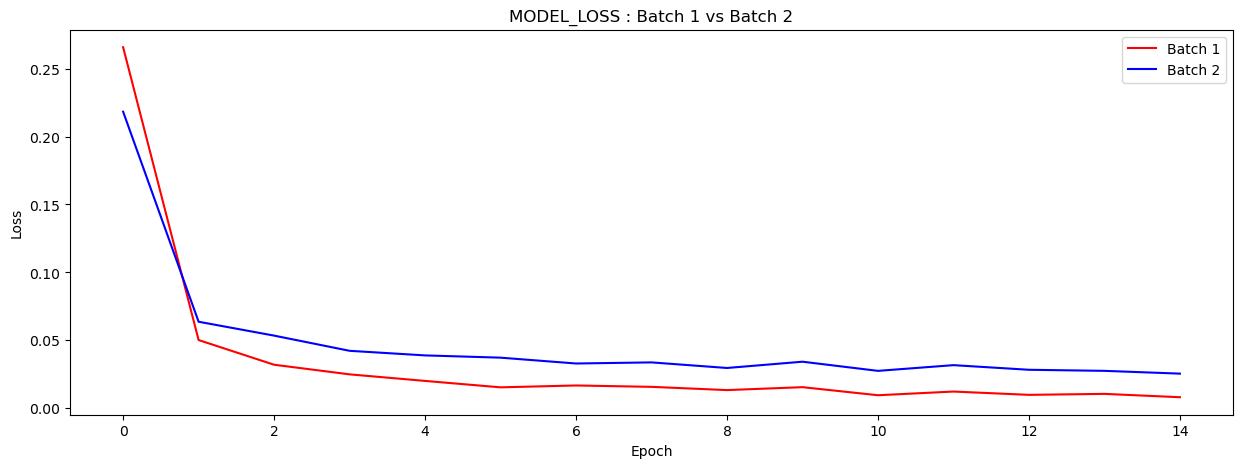

In [8]:
epoch_arr = np.arange(0, 15, 1)
plt.figure(figsize=(15,5))
plt.plot(epoch_arr, batch_1_train_loss, color = "r")
plt.plot(epoch_arr, batch_2_train_loss, color = "b")
plt.title('MODEL_LOSS : Batch 1 vs Batch 2')
plt.legend(['Batch 1', 'Batch 2'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

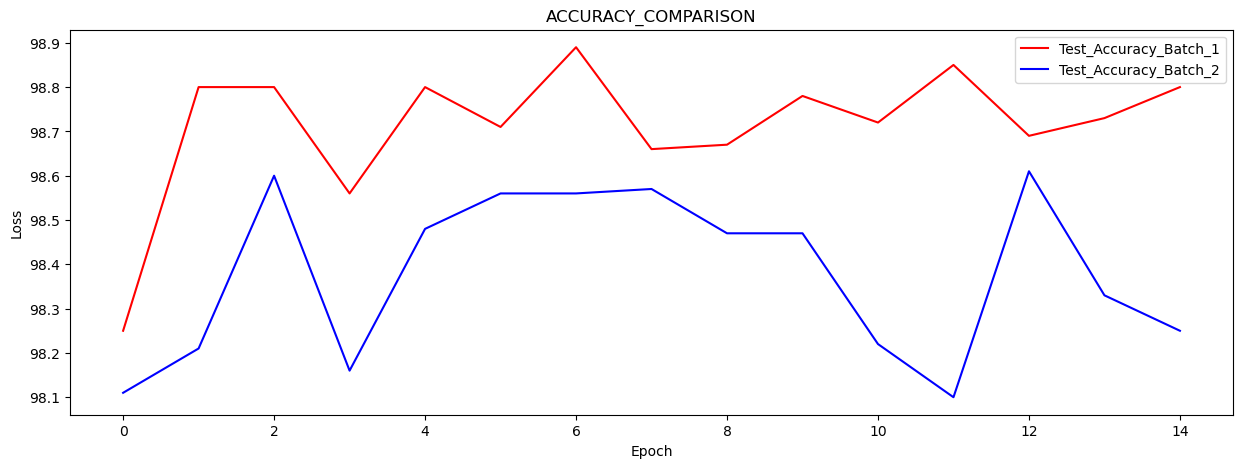

In [9]:
plt.figure(figsize=(15,5))
plt.plot(epoch_arr, batch_1_test_acc, color = "r")
plt.plot(epoch_arr, batch_2_test_acc, color = "b")
plt.title('ACCURACY_COMPARISON')
plt.legend(['Test_Accuracy_Batch_1', 'Test_Accuracy_Batch_2'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [10]:
alpha_train_loss = []
alpha_test_loss = []
alpha_train_accuracy = []
alpha_test_accuracy = []

alpha_values = np.linspace(0, 10, num = 100)
theta =[]
theta = (1 - alpha_values[:, np.newaxis]) * batch_param_1.detach().numpy() + alpha_values[:, np.newaxis] * batch_param_2.detach().numpy()

In [11]:
def compute_loss_metrics(model, train_loader, test_loader, loss_fn):
    def compute(loader):
        correct = 0
        total = 0
        cost_sum = 0
        cost_counter = 0
        with torch.no_grad():
            for data, target in loader:
                output = model(data)
                cost = loss_fn(output, target)
                cost_sum += cost
                cost_counter += 1
                correct += (torch.argmax(output, dim=1) == target).sum().item()
                total += target.size(0)
        return cost_sum / cost_counter, round(correct / total, 3)

    train_loss, train_acc = compute(train_loader)
    test_loss, test_acc = compute(test_loader)
    return train_loss, train_acc, test_loss, test_acc


In [12]:
for i in range (len(theta)):
    thetac = (1-alpha_values[i])* batch_param_1 + alpha_values[i]*batch_param_2
    model = CNN_Model()
    torch.nn.utils.vector_to_parameters(thetac, model.parameters())

    temp = []
    for param in model.parameters():
        temp.append(torch.numel(param))

    train_loss, train_acc, test_loss, test_acc = compute_loss_metrics(model, train_loader, test_loader, criterion)
    alpha_train_loss.append(train_loss)
    alpha_train_accuracy.append(train_acc)
    alpha_test_loss.append(test_loss)
    alpha_test_accuracy.append(test_acc)

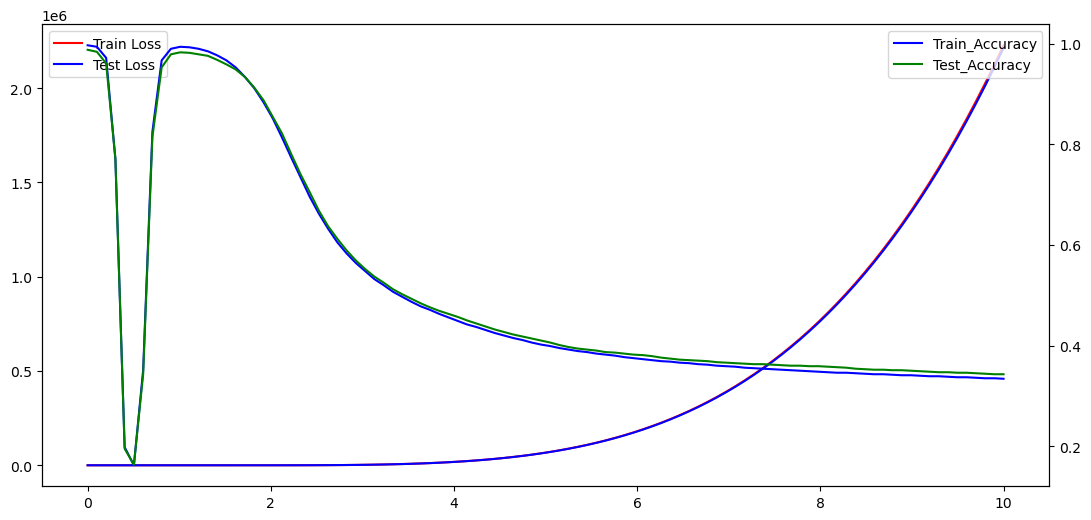

In [13]:
plt.figure(figsize=(13,6))
plt.plot(alpha_values, alpha_train_loss[:100], color = "r")
plt.plot(alpha_values, alpha_test_loss, color = "b")
plt.legend(['Train Loss' , 'Test Loss'])

plt.twinx()

plt.plot(alpha_values, alpha_train_accuracy, color = "b")
plt.plot(alpha_values, alpha_test_accuracy, color = "g")
plt.legend(['Train_Accuracy' , 'Test_Accuracy'])

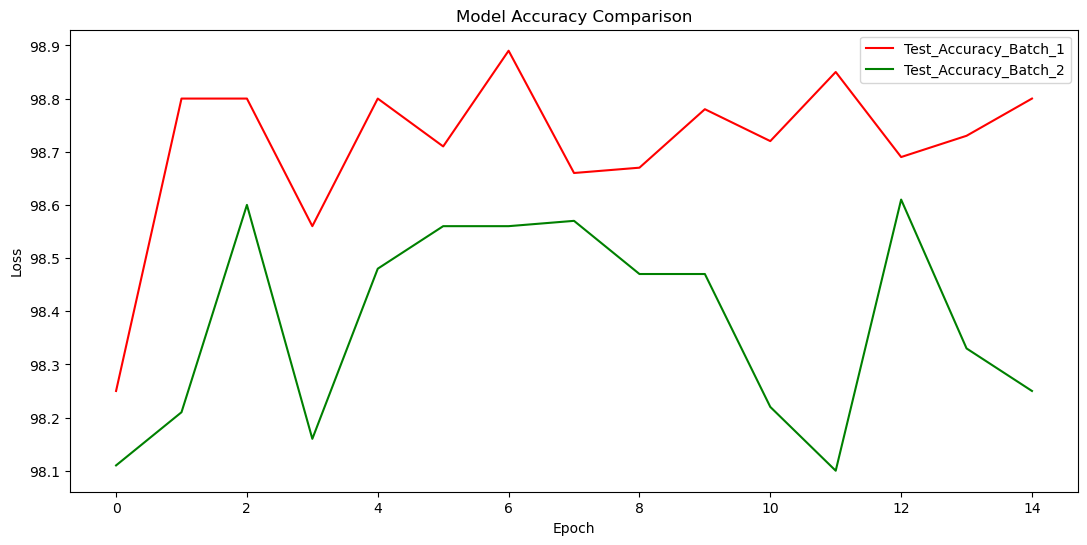

In [14]:
plt.figure(figsize=(13,6))
plt.plot(np.arange(0, 15, 1), batch_1_test_acc, color = "r")
plt.plot(np.arange(0, 15, 1), batch_2_test_acc, color = "g")
plt.title('Model Accuracy Comparison')
plt.legend(['Test_Accuracy_Batch_1', 'Test_Accuracy_Batch_2'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

